In [3]:
from cosmogrb.universe.survey import Survey
import zusammen
import arviz
import numpy as np
from cmdstanpy import cmdstan_path, CmdStanModel
import cmdstanpy
import os
import matplotlib.pyplot as plt
%matplotlib inline


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



In [5]:
ds = zusammen.DataSet.from_hdf5_file('data/sgrb.h5')

In [6]:
data = ds.to_stan_dict()
N_gen_spectra = 100
model_energy = np.logspace(0,5,N_gen_spectra)
data['N_gen_spectra'] = N_gen_spectra
data['model_energy'] = model_energy

warmup = 500
samps = 250

total = warmup + samps

chains = 4

In [7]:
cmdstanpy.utils.jsondump("test_data.json", data)

In [10]:
cmdstanpy.install_cmdstan()

2020-06-22 16:04:38 Francescas-MacBook-Pro.local cmdstanpy[4240] INFO CmdStan version: 2.23.0
2020-06-22 16:04:38 Francescas-MacBook-Pro.local cmdstanpy[4240] INFO Install directory: /Users/fran/.cmdstanpy
2020-06-22 16:04:38 Francescas-MacBook-Pro.local cmdstanpy[4240] INFO Downloading CmdStan version 2.23.0
2020-06-22 16:04:38 Francescas-MacBook-Pro.local cmdstanpy[4240] INFO Download successful, file: /var/folders/zz/vwx_xzvd7vng2x_4qh2l3xf00000gn/T/tmpg8gorv6r
2020-06-22 16:04:38 Francescas-MacBook-Pro.local cmdstanpy[4240] INFO Unpacked download as cmdstan-2.23.0
2020-06-22 16:04:38 Francescas-MacBook-Pro.local cmdstanpy[4240] INFO Building cmdstan-2.23.0 binaries
2020-06-22 16:04:38 Francescas-MacBook-Pro.local cmdstanpy[4240] INFO Test model compilation
2020-06-22 16:04:38 Francescas-MacBook-Pro.local cmdstanpy[4240] INFO Installed cmdstan-2.23.0


True

In [11]:
model = CmdStanModel(stan_file="stan/cor_test.stan", cpp_options={'STAN_THREADS': 'TRUE'})

2020-06-22 16:04:50 Francescas-MacBook-Pro.local cmdstanpy[4240] INFO compiling stan program, exe file: /Users/fran/projects/zusammen/examples/stan/cor_test
2020-06-22 16:04:50 Francescas-MacBook-Pro.local cmdstanpy[4240] INFO compiler options: stanc_options={'include_paths': ['/Users/fran/projects/zusammen/examples/stan']}, cpp_options={'STAN_THREADS': 'TRUE'}
2020-06-22 16:05:17 Francescas-MacBook-Pro.local cmdstanpy[4240] INFO compiled model file: /Users/fran/projects/zusammen/examples/stan/cor_test


In [ ]:
os.environ["STAN_NUM_THREADS"] = "4"

fit = model.sample(
    data=data,
    cores=4,
    iter_warmup=warmup,
    iter_sampling=samps,
    chains=chains,
    max_treedepth=10,
    show_progress="notebook",
    seed=16574)

av = arviz.from_cmdstanpy(fit)

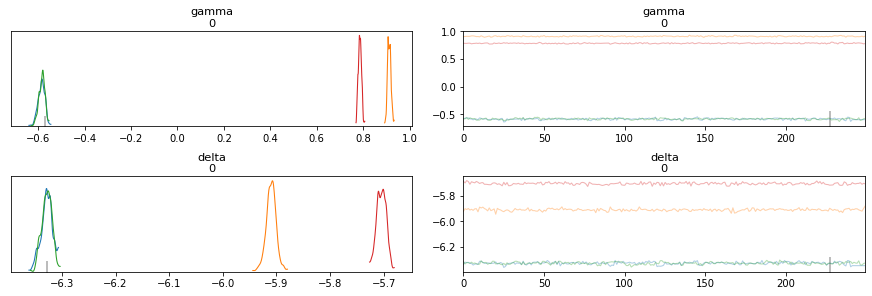

In [145]:
arviz.plot_trace(av, var_names=["gamma", "delta"]);

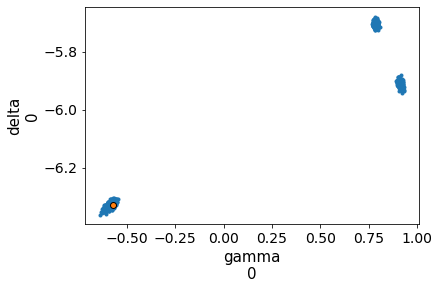

In [146]:
arviz.plot_pair(av,var_names=["gamma", "delta"], divergences=True);

In [154]:
av.posterior

<xarray.Dataset>
Dimensions:                (alpha_dim_0: 9, chain: 4, draw: 250, log_energy_flux_dim_0: 9, log_epeak_dim_0: 9)
Coordinates:
  * chain                  (chain) int64 0 1 2 3
  * draw                   (draw) int64 0 1 2 3 4 5 ... 244 245 246 247 248 249
  * alpha_dim_0            (alpha_dim_0) int64 0 1 2 3 4 5 6 7 8
  * log_epeak_dim_0        (log_epeak_dim_0) int64 0 1 2 3 4 5 6 7 8
  * log_energy_flux_dim_0  (log_energy_flux_dim_0) int64 0 1 2 3 4 5 6 7 8
Data variables:
    alpha                  (chain, draw, alpha_dim_0) float64 -1.315 ... -1.353
    log_epeak              (chain, draw, log_epeak_dim_0) float64 2.251 ... 0.6593
    log_energy_flux        (chain, draw, log_energy_flux_dim_0) float64 -5.518 ... -7.797
Attributes:
    created_at:                 2020-06-22T09:00:43.373578
    arviz_version:              0.8.3
    inference_library:          cmdstanpy
    inference_library_version:  0.9.5

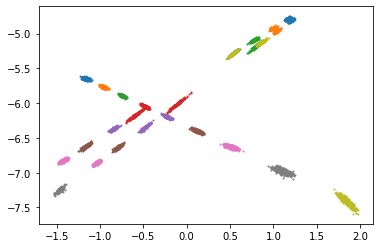

In [147]:
fig, ax = plt.subplots()

for i in range(9):

    ax.scatter(np.concatenate(av.posterior.normed_epeak[:,:,i]), 
               np.concatenate(av.posterior.raw_ef[:,:,i]), s=1)
    
    
xx = np.linspace(0,3,50)


#ax.plot(xx+2, 1.2 * (xx+2) - 10.6)



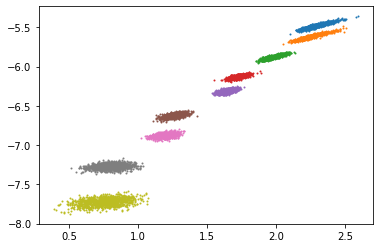

In [151]:
fig, ax = plt.subplots()

for i in range(9):

    ax.scatter(np.concatenate(av.posterior.log_epeak[:,:,i]),
               np.concatenate(av.posterior.log_energy_flux[:,:,i]), s=1)
    
    
xx = np.linspace(0,3,50)



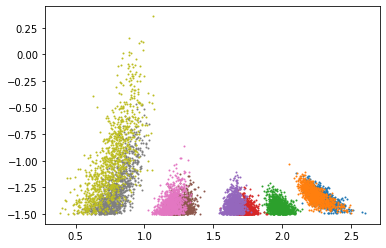

In [152]:
fig, ax = plt.subplots()

for i in range(9):

    ax.scatter(np.concatenate(av.posterior.log_epeak[:,:,i]),np.concatenate(av.posterior.alpha[:,:,i]), s=1)
    
    
# xx = np.linspace(0,3,50)


# ax.plot(xx, 1.46 * xx - 8.7)

# ax.plot(xx, 1.5 * xx - 8.7)

[Text(0, 0.5, 'alpha'), Text(0.5, 0, 'log energy flux')]

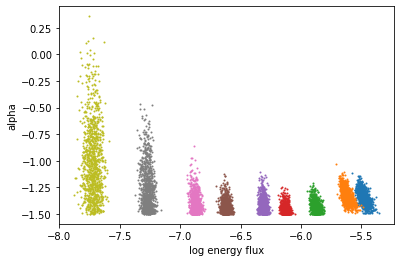

In [153]:
fig, ax = plt.subplots()

for i in range(9):

    ax.scatter(np.concatenate(av.posterior.log_energy_flux[:,:,i]),np.concatenate(av.posterior.alpha[:,:,i]), s=1)
    
    
# xx = np.linspace(0,3,50)


# ax.plot(xx, 1.46 * xx - 8.7)

# ax.plot(xx, 1.5 * xx - 8.7)


ax.set(xlabel="log energy flux", ylabel="alpha")